A continuación se realiza el estudio del conjunto de datos de encefalograma con la finalidad de reconocer patrones en el conjunto de datos, que permita la identificación de desordenes psiquiáticos mayores.

Antes de comenzar, se realiza la carga de las librerías necesarias para la creción de los componentes del análisis de datos

In [30]:
#Import the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Obtain the data

Se realizó la descarga de la base de datos alojada en https://osf.io/8bsvr/. Posteriormete se almacenó el archivo en la carpeta Dataset dentro de la ruta local del proyecto, finalmente se realizó la carga del archivo csv y se almacenó en la variable data.

In [31]:
#Load the dataset 
data = pd.read_csv("Datasets/EEG.machinelearing_data_BRMH.csv")


Explore the data

Según la descripción del paper "Identification of Major Psychiatric Disorders From Resting-State Electroencephalography Using a Machine Learning Approach" almacenado en https://www.frontiersin.org/articles/10.3389/fpsyt.2021.707581/full, el conjunto de datos considera una muestra de 945 sujetos divididos en 2 grupos: 850 pacientes con trastornos psiquiátricos mayores (6 trastornos categóricos grandes y 9 específicos) y 95 controles sanos (HC). Para comprobar si efectivamente dataset contiene esta información se realizó una muestra de la información general de la base de datos. Se pudo determinar que la cantidad de filas corresponde a los datos entregados por el artículo, con una extensión 945 Filas x 1149 Columnas.

In [32]:
#show information about the dataset such as data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB


Una vez conocida la dimensionalidad de la base de datos, se procede a conocer la información estadística del dataset.

In [33]:
#show statistical information about the dataset
data.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


Se analizan las primeras 5 filas del dataset

In [34]:
#show the first 5 rows of the dataset
data.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


Se analizan las últimas 5 filas del dataset

In [35]:
#show the last 5 rows of the dataset
data.tail()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
940,941,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,942,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446
944,945,M,21.0,2015.10.23,13.0,105.0,Healthy control,Healthy control,65.195346,69.241972,...,78.600293,68.255430,70.687410,74.433908,74.294750,53.254681,72.755265,47.810386,80.166825,64.380273



Luego de analizar los primeros 5 datos y los últimos 5 datos se pudo identificar que la columna no. (número de paciente) es un candidato ideal para representar el identificador del dataset. Se realizó un cambio de nombre a las columnas no. por Pacient ID y eeg.date por Date.

In [36]:
#rename important columns

#remane the first column to "Pacient ID"
data.rename(columns={'no.':'Pacient ID'}, inplace=True)
#rename the "eeg.date" column to "Date"
data.rename(columns={'eeg.date':'Date'}, inplace=True)

Una vez realizada la actualización de nombre, se colocó la columna Pacient ID como identificador del conjunto de datos.

In [37]:
#set the "Paciente ID" column as index of the dataframe
data.set_index('Pacient ID', inplace=True)

Se vuelve a imprimir los datos para visualizar los cambios realizados.

In [38]:
#show the first 5 rows of the dataset
data.head()

,sex,age,Date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
Pacient ID,,,,,,,,,,,,,,,,,,,,,
1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


Posteriormente se realizó la impresión de las fechas de cada paciente del dataset.

In [40]:
#print dates
print(data['Date'])

Pacient ID
1       2012.8.30
2        2012.9.6
3       2012.9.10
4       2012.10.8
5      2012.10.18
          ...    
941     2014.8.28
942     2014.9.19
943     2014.9.27
944     2014.9.20
945    2015.10.23
Name: Date, Length: 945, dtype: object


WORKING IN PROGRESS
WORKING IN PROGRESS
WORKING IN PROGRESS
WORKING IN PROGRESS
WORKING IN PROGRESS
WORKING IN PROGRESS
WORKING IN PROGRESS
WORKING IN PROGRESS
WORKING IN PROGRESS
WORKING IN PROGRESS
WORKING IN PROGRESS

check for outliners using boxplots 

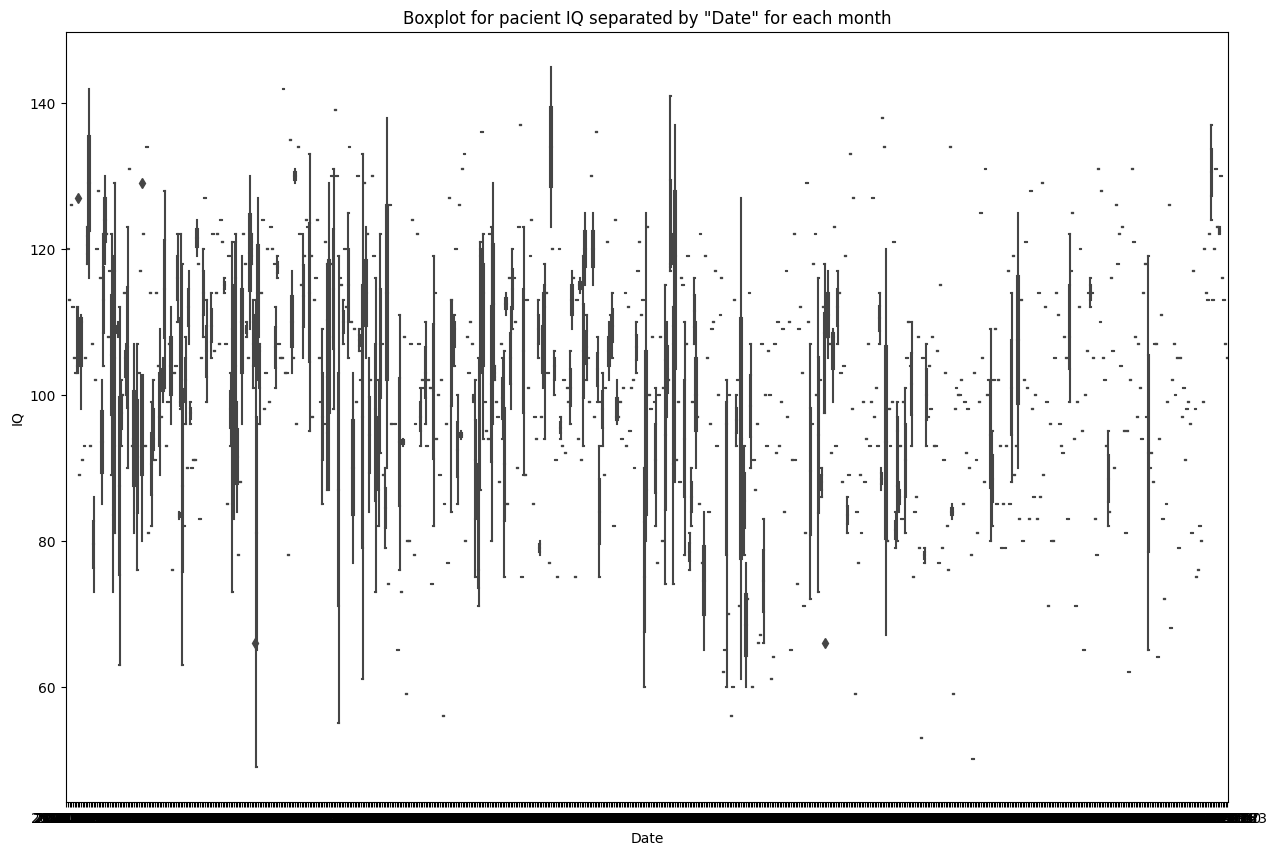

In [46]:
#plot boxplot for pacient IQ separated by "Date" for each month
plt.figure(figsize=(15,10))
sns.boxplot(x='Date', y='IQ', data=data)
plt.xlabel('Date')
plt.ylabel('IQ')
plt.title('Boxplot for pacient IQ separated by "Date" for each month')
plt.show()